# Load the dataset

In [1]:
import pandas as pd


columns = ['ID', 'Entity', 'Sentiment', 'Tweet']
df = pd.read_csv('twitter_training.csv',names=columns)
df.head()


,ID,Entity,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [2]:
df.dropna(inplace=True)

# DATA CLEANING

In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define a function to clean the text data
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

In [4]:

# Apply the cleaning function to the 'Tweet content' column
df['clean_text'] = df['Tweet'].apply(clean_text)
# Display the first few rows of the cleaned data
df.head()

,ID,Entity,Sentiment,Tweet,clean_text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting borderlands murder
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,coming borders kill
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting borderlands kill
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming borderlands murder
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting borderlands murder


# Generating a word cloud for each sentiment class

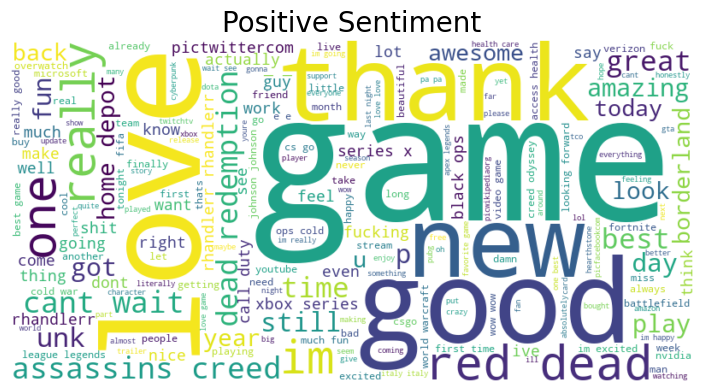

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#
# Combine all tweets with positive sentiment into a single string
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['clean_text'])
# Create the WordCloud object
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)


# Plot the word clouds
plt.figure(figsize=(30, 10))

# Plot the word cloud for positive sentiment
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Sentiment', fontsize=20)
plt.axis('off')



# Display the plots
plt.show()


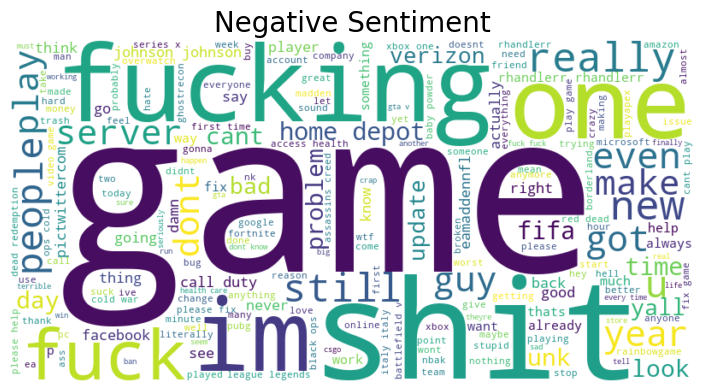

In [6]:
# Combine all tweets with negative sentiment into a single string
negative_text = ' '.join(df[df['Sentiment'] == 'Negative']['clean_text'])
# Create the WordCloud object
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(30, 10))

# Plot the word cloud for negative sentiment
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Sentiment', fontsize=20)
plt.axis('off')

plt.show()


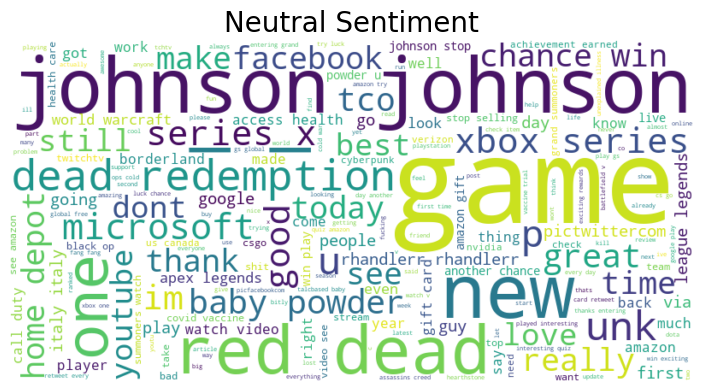

In [7]:
# Combine all tweets with neutral sentiment into a single string
neutral_text = ' '.join(df[df['Sentiment'] == 'Neutral']['clean_text'])
# Create the WordCloud object
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Plot the word clouds
plt.figure(figsize=(30, 10))

# Plot the word cloud for neutral sentiment
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Neutral Sentiment', fontsize=20)
plt.axis('off')

plt.show()

# FREQUENCY DISTRIBUTION PLOT FOR EACH SENTIMENT CLASS

In [8]:
from collections import Counter
import seaborn as sns


# Word frequency analysis for each sentiment
positive_words = ' '.join(df[df['Sentiment'] == 'Positive']['clean_text']).split()
negative_words = ' '.join(df[df['Sentiment'] == 'Negative']['clean_text']).split()
neutral_words = ' '.join(df[df['Sentiment'] == 'Neutral']['clean_text']).split()

positive_counts = Counter(positive_words).most_common(10)
negative_counts = Counter(negative_words).most_common(10)
neutral_counts = Counter(neutral_words).most_common(10)


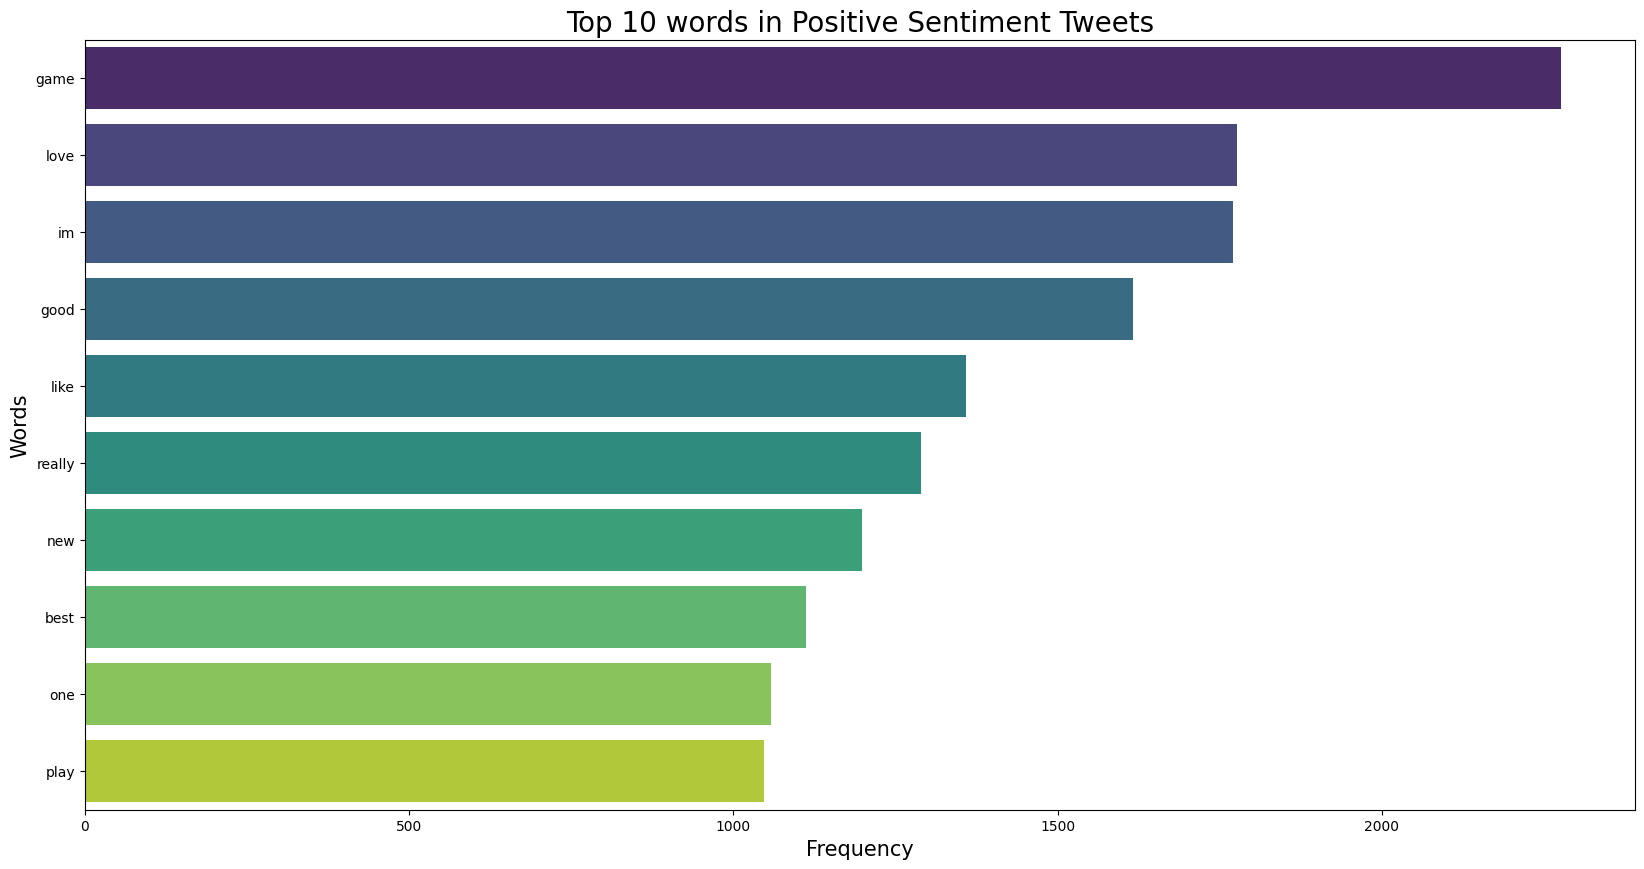

In [9]:
# Create a barplot for word frequencies in positive sentiment tweets

plt.figure(figsize=(20, 10))
words, counts = zip(*positive_counts)
sns.barplot(x=counts, y=words, hue=words, palette='viridis')
plt.title('Top 10 words in Positive Sentiment Tweets', fontsize=20)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Words', fontsize=15)
plt.show()

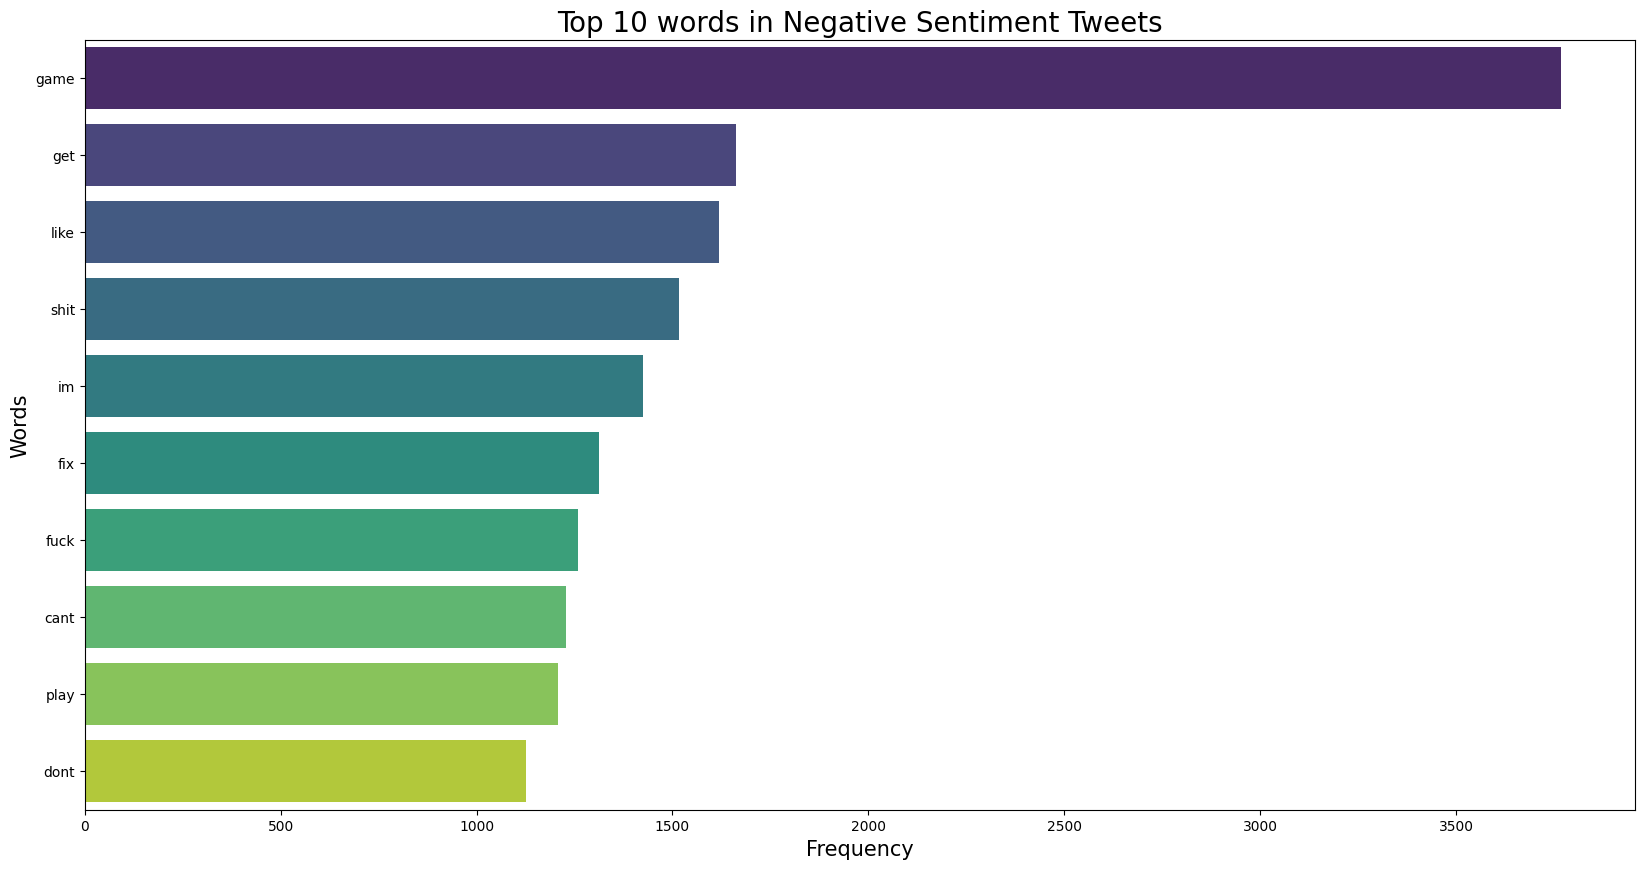

In [10]:
# Create a barplot for word frequencies in negative sentiment tweets

plt.figure(figsize=(20, 10))
words, counts = zip(*negative_counts)
sns.barplot(x=counts, y=words, hue=words , palette='viridis')
plt.title('Top 10 words in Negative Sentiment Tweets', fontsize=20)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Words', fontsize=15)
plt.show()

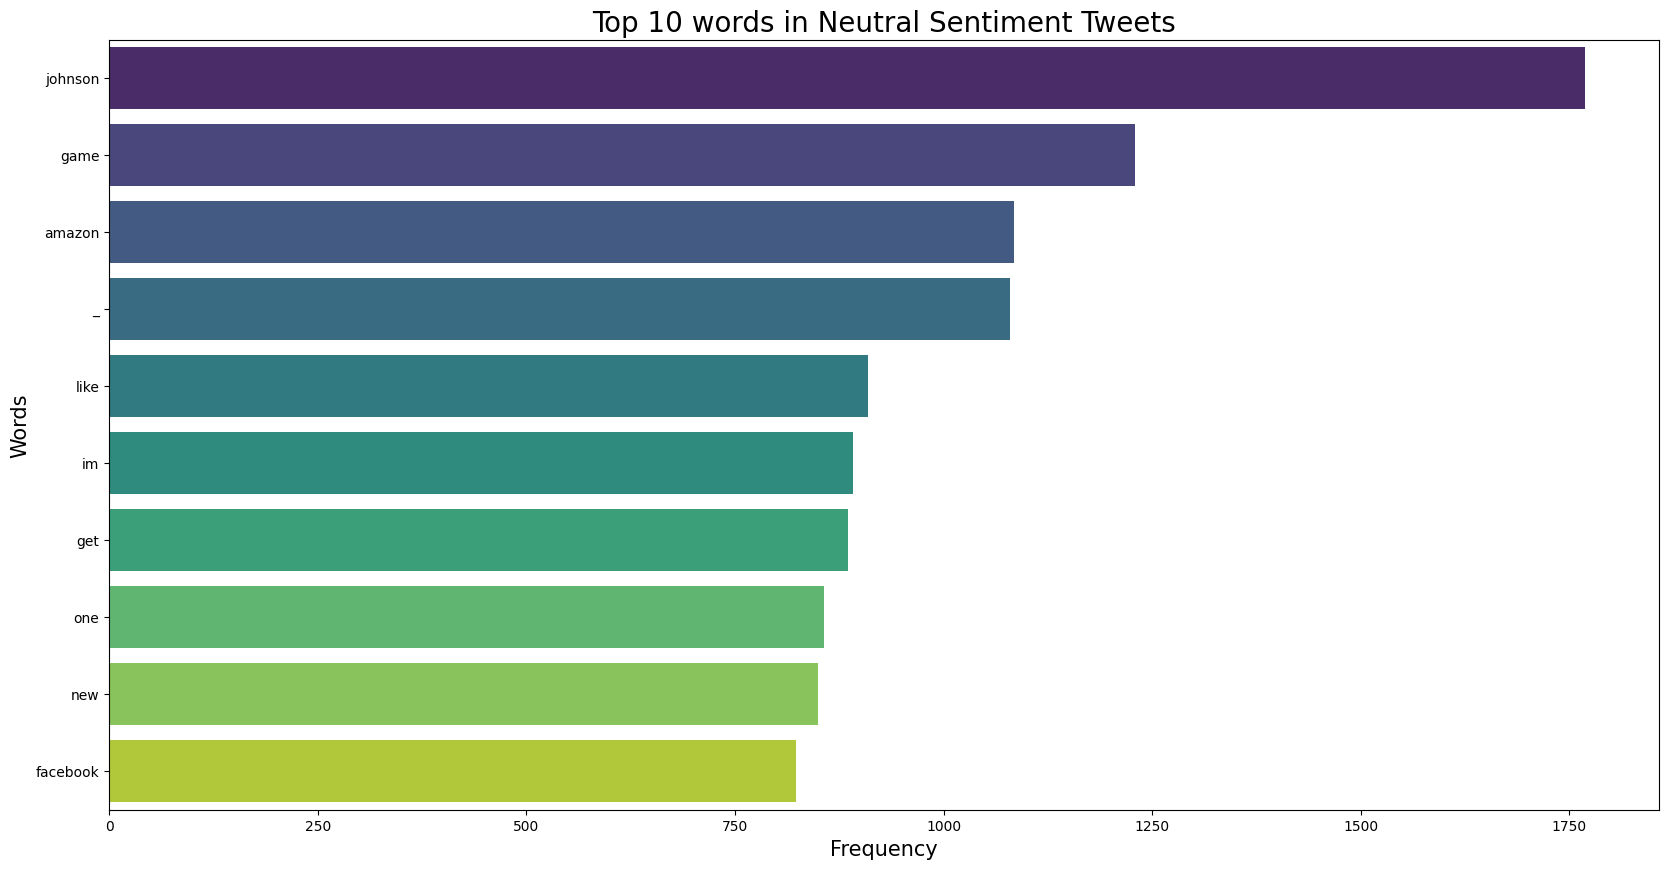

In [11]:
# Create a barplot for word frequencies in neutral sentiment tweets

plt.figure(figsize=(20, 10))
words, counts = zip(*neutral_counts)
sns.barplot(x=counts, y=words, hue=words , palette='viridis')
plt.title('Top 10 words in Neutral Sentiment Tweets', fontsize=20)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Words', fontsize=15)
plt.show()

# PLOTTING THE FREQUENCY DISTRIBUTION OF BIGRAMS

In [12]:
from nltk import ngrams

# Define a function 
def plot_bigrams(text, title):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Create bigrams from the tokens
    bigrams = ngrams(tokens, 2)
    # Create a frequency distribution of the bigrams
    bigram_freq = Counter(bigrams)
    # Get the 20 most common bigrams
    common_bigrams = bigram_freq.most_common(20)
    
    # Separate the bigrams and their frequencies for plotting
    bigrams = [' '.join(words) for words, count in common_bigrams]
    counts = [count for words, count in common_bigrams]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=bigrams, hue=bigrams, palette='coolwarm')
    plt.title(title, fontsize=15)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel('Bigrams', fontsize=12)
    plt.show()



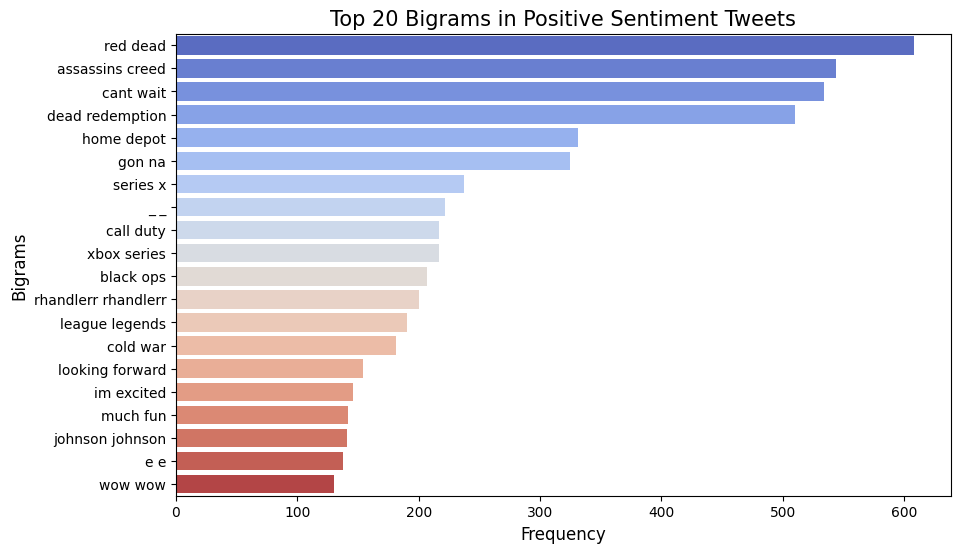

In [13]:
# Plot the bigrams for positive sentiment
plot_bigrams(positive_text, 'Top 20 Bigrams in Positive Sentiment Tweets')

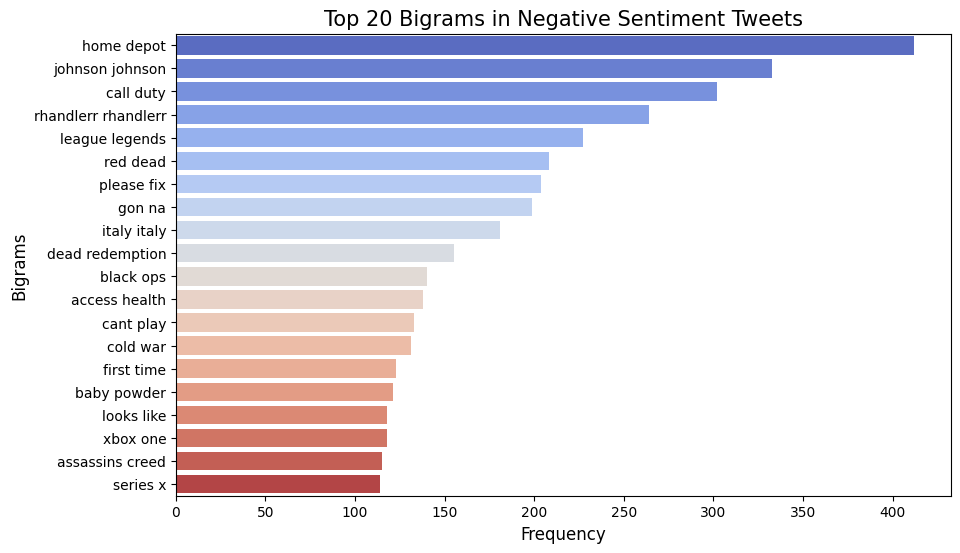

In [14]:
# Plot the bigrams for negative sentiment
plot_bigrams(negative_text, 'Top 20 Bigrams in Negative Sentiment Tweets')

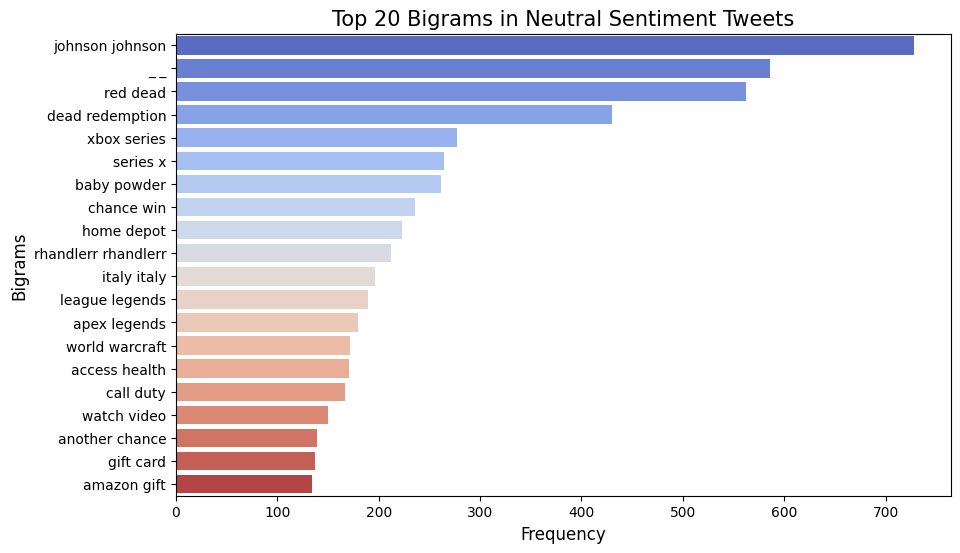

In [15]:

# Plot the bigrams for neutral sentiment
plot_bigrams(neutral_text, 'Top 20 Bigrams in Neutral Sentiment Tweets')